In [1]:
#https://lkreidberg.github.io/batman/docs/html/quickstart.html
import batman
import numpy as np
import matplotlib.pyplot as plt

Using more apporiate units to model different parameters and what light curve shape they produce

+ Figured out some conversions like, R_planet (R_jup) to stellar radii and a_major (AU) to stellar radii  

In [2]:
#1 R_J = 0.102763 R_sun
#1 R_sun = 1 / 0.10045

#1 AU = 215 R_sun

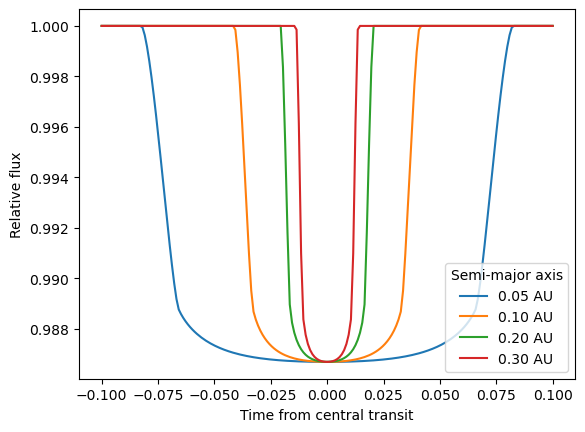

In [3]:
R_star = 1 #R_sun
R_planet = 1.1 #R_J
semi_major_axis = 10 #AU

semi_major_axis = [0.05, 0.1, 0.2, 0.3] # AU  
#.. Chapter 4, p130. Semi-major axis range for transit detection + http://exoplanets.org/

#Quick start example
params = batman.TransitParams()
params.t0 = 0.                       #time of inferior conjunction
params.per = 5                  #orbital period
params.rp = R_planet * 0.10045 #R_Sun       #planet radius (in units of stellar radii)
params.a = 15                        #semi-major axis (in units of stellar radii)
params.inc = 90.                     #orbital inclination (in degrees)
params.ecc = 0.                      #eccentricity
params.w = 90.                       #longitude of periastron (in degrees)
params.u = [0.1, 0.3]                #limb darkening coefficients [u1, u2]
params.limb_dark = "quadratic"       #limb darkening model

t = np.linspace(-0.1, 0.1, 200)

array = np.divide(np.multiply(semi_major_axis, 215.032), R_star) #Convert to Stellar radii

for params.a, a_au in zip(array, semi_major_axis):
    m = batman.TransitModel(params, t)    #initializes model
    flux_initial = m.light_curve(params)          #calculates light curve
    plt.plot(t, flux_initial, label = "{:.2f} AU".format(a_au))
plt.xlabel("Time from central transit")
plt.ylabel("Relative flux")
plt.legend(title="Semi-major axis", loc='lower right')
plt.show()

#Transit duration
#T_{dur} = \frac{P R}{\pi a}
#Assuming P (period) and R (star radius) is constant, transit duration follows this relation,
#T_{dur} ~ \frac{1}{a}

After supervisor meeting 26/10/2022 -
Fixing the period and changing the semi-major axis will cause the orbital speed to be quicker. This graph above does not reflect the true relation between semi-major axis and T_duration. A more realistic graph will be made in example_4.ipynb to show

[0.00498401 0.00936171 0.03617258 0.08560158 0.102763  ]


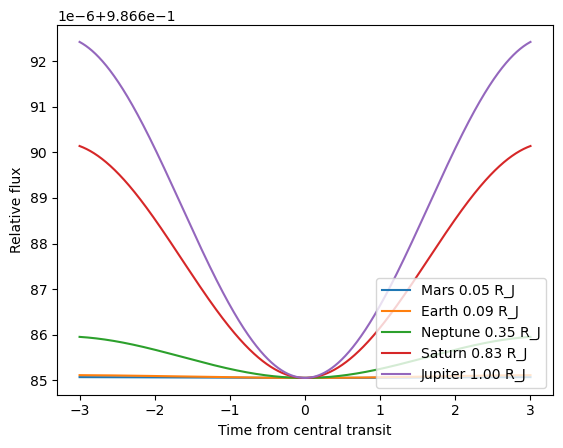

In [4]:
R_star = 1 #R_sun

semi_major_axis = 0.4 #AU
planet_label = ["Mars", "Earth", "Neptune", "Saturn", "Jupiter"]
planet_radius = [0.0485, 0.0911, 0.352, 0.833, 1] #R_J
#Values quoted from https://solarsystem.nasa.gov/resources/686/solar-system-sizes/

#Quick start example
params = batman.TransitParams()
params.t0 = 0.                       #time of inferior conjunction
params.per = 13                  #orbital period
params.rp = R_planet * 0.10045 #R_Sun       #planet radius (in units of stellar radii)
params.a = (semi_major_axis * 215.032) / R_star #semi-major axis (in units of stellar radii)
params.inc = 90.                     #orbital inclination (in degrees)
params.ecc = 0.                      #eccentricity
params.w = 90.                       #longitude of periastron (in degrees)
params.u = [0.1, 0.3]                #limb darkening coefficients [u1, u2]
params.limb_dark = "quadratic"       #limb darkening model

t = np.linspace(-3, 3, 10000)

array = np.divide(np.multiply(planet_radius, 0.102763), R_star) #Planetary radius in stellar radii
print(array)

for params.a, p_radius, p_label in zip(array, planet_radius, planet_label):
    m = batman.TransitModel(params, t)    #initializes model
    flux_initial = m.light_curve(params)          #calculates light curve
    plt.plot(t, flux_initial, label = "{} {:.2f} R_J".format(p_label, p_radius))
plt.xlabel("Time from central transit")
plt.ylabel("Relative flux")
plt.legend(loc='lower right')
plt.show()

#Fixed semi-major axis.

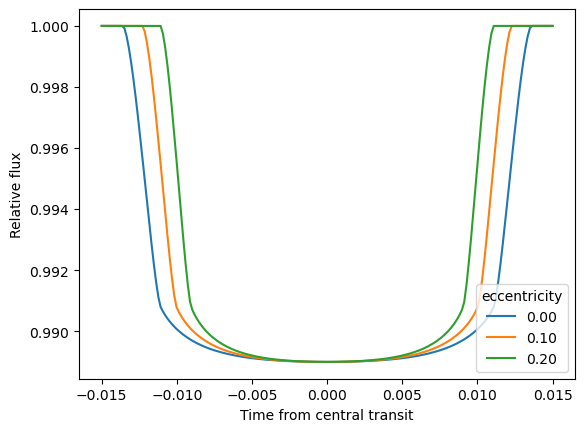

In [5]:
R_star = 1 #R_sun
R_planet = 1 #R_J
semi_major_axis = 0.3 #AU 

ecc = [0, 0.1, 0.2]

#Quick start example
params = batman.TransitParams()
params.t0 = 0.                       #time of inferior conjunction
params.per = 5                  #orbital period
params.rp = R_planet * 0.10045 #R_Sun       #planet radius (in units of stellar radii)
params.a = (semi_major_axis * 215.032) / R_star #semi-major axis (in units of stellar radii)
params.inc = 90.                     #orbital inclination (in degrees)
params.ecc = 0.                      #eccentricity
params.w = 90.                       #longitude of periastron (in degrees)
params.u = [0.1, 0.3]                #limb darkening coefficients [u1, u2]
params.limb_dark = "quadratic"       #limb darkening model

t = np.linspace(-0.015, 0.015, 200)


for params.ecc in ecc:
    m = batman.TransitModel(params, t)    #initializes model
    flux = m.light_curve(params)          #calculates light curve
    plt.plot(t, flux, label = "{:.2f}".format(params.ecc))
plt.xlabel("Time from central transit")
plt.ylabel("Relative flux")
plt.legend(title = "eccentricity", loc='lower right')
plt.show()


params.a 64.51 stellar radii


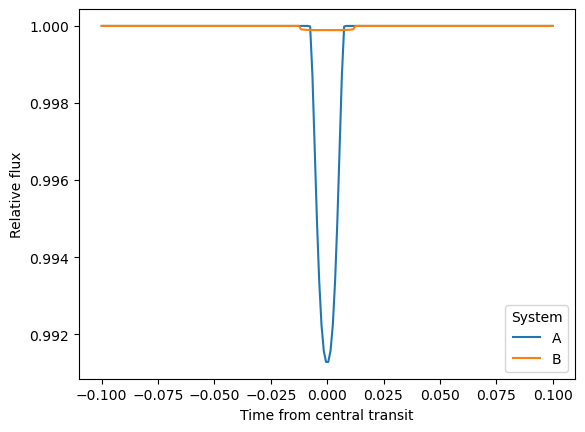

In [6]:
#Exercise 3.7 (p 115)

R_star = 1 #R_sun
R_planet = 1.1 #R_J
semi_major_axis = 0.3 #AU

#.. Chapter 4, p130. Semi-major axis range for transit detection + http://exoplanets.org/

#Quick start example
params = batman.TransitParams()
params.t0 = 0.                       #time of inferior conjunction
params.per = 5                  #orbital period
params.rp = R_planet * 0.10045 #R_Sun       #planet radius (in units of stellar radii)
params.a = (semi_major_axis * 215.032) / R_star              #semi-major axis (in units of stellar radii)
params.inc = 90.                     #orbital inclination (in degrees)
params.ecc = 0.                      #eccentricity
params.w = 90.                       #longitude of periastron (in degrees)
params.u = [0.1, 0.3]                #limb darkening coefficients [u1, u2]
params.limb_dark = "quadratic"       #limb darkening model

t = np.linspace(-0.1, 0.1, 200)

print("params.a %.2f stellar radii" % params.a)
labels = ["A", "B"]

for params.rp, params.inc, lb in zip([0.1, 0.01], [89.19, 90], labels):
    m = batman.TransitModel(params, t)    #initializes model
    flux = m.light_curve(params)          #calculates light curve
    plt.plot(t, flux, label=lb)
plt.xlabel("Time from central transit")
plt.ylabel("Relative flux")
plt.legend(title = "System", loc='lower right')
plt.show()